In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re 
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('/home/garrett/Documents/Machine_Learning/Project/data.csv')

In [3]:
def clean(line):
    line = line.lower() 
    line = line.replace('|||', " ") 
    line = line.translate({ord(x):''for x in string.punctuation})
    line = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', '', line, flags=re.MULTILINE)
    
    return line
df['posts'] = df['posts'].apply(clean)    

In [4]:
df['words/post'] = df['posts'].apply(lambda x: len(x.split(' ')))
#df['avg words'] = df['words/post'].apply(lambda x: sum(x)/len(x)) 
df['avg words'] = sum(map(int, df['words/post'])) / len(df['posts'])

df['char/post'] = df['posts'].apply(lambda x: len(x))
#df['avg chars'] = df['char/post'].apply(lambda x: sum(x)/len(x))

In [5]:
plt.subplots(figsize=(20,15))
sns.boxplot("type", "avg words", data=df)
sns.swarmplot("type", "avg words", data=df)
sns.despine()

/home/garrett/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


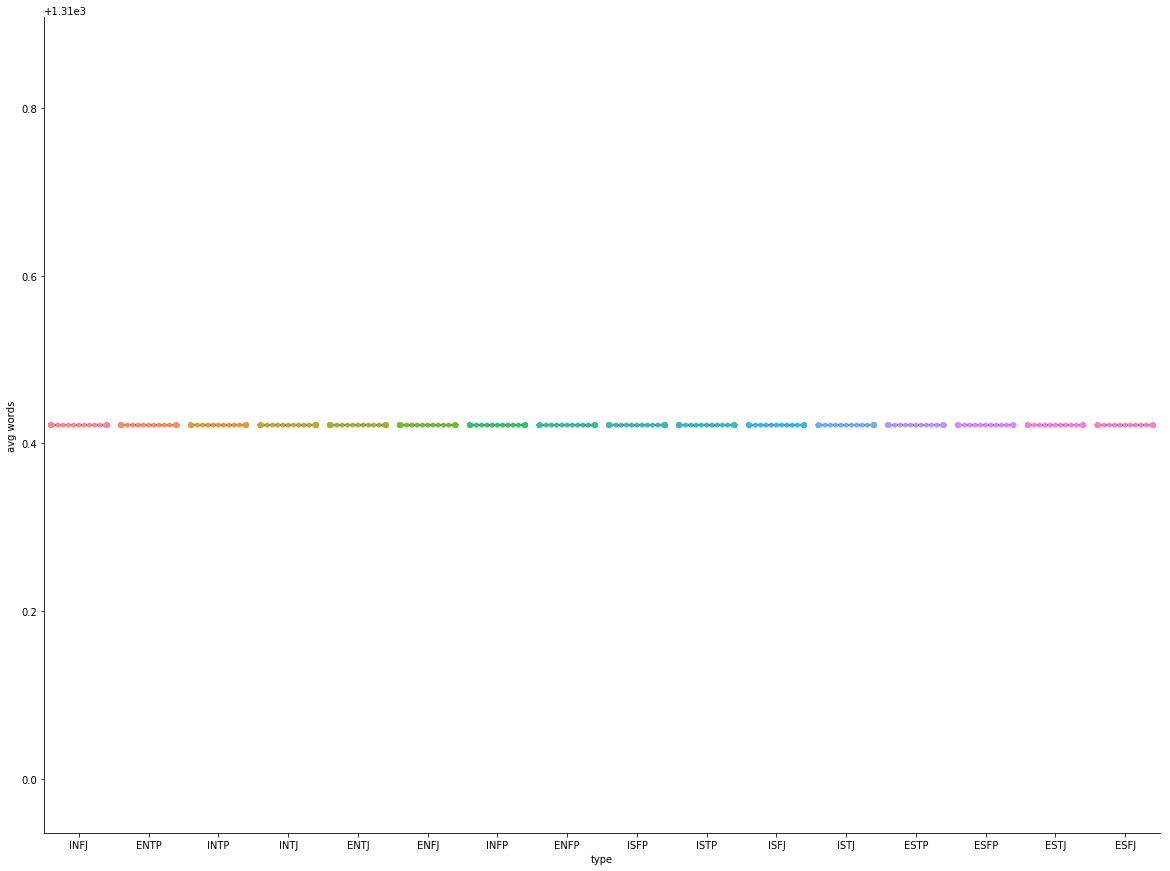

In [6]:
plt.show()

In [7]:
from sklearn.preprocessing import LabelBinarizer
labels=df.index.tolist()
encoder=LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)
labels=encoder.fit_transform(labels)
labels=np.array(labels)
print(labels[50:55])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
df['words/post'].max()


2261

In [9]:
sum([x for x in df['words/post']])/(len(df['words/post']))

1310.4219020172911

In [10]:
len([x for x in df['words/post'] if x > 1363])


4335

In [11]:
len([x for x in df['words/post'] if x <= 1363])

4340

In [12]:
vect = CountVectorizer()

In [13]:
vocab = vect.fit_transform(df['posts'])
print(vocab.shape)

(8675, 185182)


In [14]:
seq_len = 500
features = np.zeros((len(vect)))

TypeError: object of type 'CountVectorizer' has no len()

In [ ]:
df

In [ ]:
df.plot.hist(by = "type", bins=16)
plt.show()